In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
#df = pd.read_csv('investments_VC.csv', encoding= 'unicode_escape')
dfo = pd.read_csv('funding_rounds.csv')

In [5]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52928 non-null  int64  
 1   funding_round_id          52928 non-null  int64  
 2   object_id                 52928 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52928 non-null  object 
 5   funding_round_code        52928 non-null  object 
 6   raised_amount_usd         52928 non-null  float64
 7   raised_amount             52928 non-null  float64
 8   raised_currency_code      49862 non-null  object 
 9   pre_money_valuation_usd   52928 non-null  float64
 10  pre_money_valuation       52928 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52928 non-null  float64
 13  post_money_valuation      52928 non-null  float64
 14  post_m

In [6]:
dfo.shape

(52928, 23)

In [7]:
dfo.head(3)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,0.0,USD,0.0,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,115000000.0,USD,0.0,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23


# CLEANING

In [8]:
#df = df.dropna(subset=['name'])
#dfo = dfo.pivot_table(index=['id','post_money_valuation'], columns='funding_round_type', values='raised_amount')
dfo = dfo.pivot_table(index=['id','post_money_valuation', 'pre_money_valuation', 'participants'], columns='funding_round_type', values='raised_amount')

In [9]:
# Replace NaN's with zero
dfo.fillna(value=0, inplace=True)

In [10]:
dfo.head(10)

,,,funding_round_type,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
id,post_money_valuation,pre_money_valuation,participants,,,,,,,,,
1,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0
2,0.0,0.0,2,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,115000000.0,3,0.0,0.0,0.0,0.0,0.0,12700000.0,0.0,0.0,0.0
4,0.0,525000000.0,4,0.0,0.0,0.0,0.0,0.0,0.0,27500000.0,0.0,0.0
5,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,10500000.0,0.0,0.0
6,10000000.0,8500000.0,1,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,0.0
7,110000000.0,100000000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,0.0,0.0
8,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,1500000.0,0.0,0.0,0.0
9,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,6300000.0,0.0,0.0,0.0


In [11]:
dfo.reset_index(inplace=True)
dfo.set_index('id')

funding_round_type,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
id,,,,,,,,,,,,
1,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0
2,0.0,0.0,2,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,115000000.0,3,0.0,0.0,0.0,0.0,0.0,12700000.0,0.0,0.0,0.0
4,0.0,525000000.0,4,0.0,0.0,0.0,0.0,0.0,0.0,27500000.0,0.0,0.0
5,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,10500000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57948,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,3000000.0,0.0,0.0,0.0
57949,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570000.0
57950,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2184100.0


In [13]:
dfo.head(3)

funding_round_type,id,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
0,1,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0
1,2,0.0,0.0,2,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,115000000.0,3,0.0,0.0,0.0,0.0,0.0,12700000.0,0.0,0.0,0.0


funding_round_type,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
id,,,,,,,,,,,,
1,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0
2,0.0,0.0,2,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,115000000.0,3,0.0,0.0,0.0,0.0,0.0,12700000.0,0.0,0.0,0.0
4,0.0,525000000.0,4,0.0,0.0,0.0,0.0,0.0,0.0,27500000.0,0.0,0.0
5,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,10500000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57948,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,3000000.0,0.0,0.0,0.0
57949,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570000.0
57950,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2184100.0


In [15]:
dfo.describe()

funding_round_type,id,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
count,52928.000000,5.292800e+04,5.292800e+04,52928.000000,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04
mean,28962.894536,1.862279e+06,3.294525e+05,1.528567,7.949544e+04,3.277511e+03,8.902244e+05,2.784142e+05,4.919190e+05,1.164014e+06,1.062597e+06,1.680002e+06,2.406176e+06
std,16821.871803,1.287686e+08,6.531803e+07,2.060192,3.307221e+05,1.699208e+05,2.888538e+07,1.858552e+07,1.486710e+07,1.037682e+07,6.281118e+06,1.080340e+07,1.987085e+07
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,14343.750000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,28885.500000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,43561.250000,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+05
max,57952.000000,2.432423e+10,1.500000e+10,36.000000,3.100000e+07,2.000000e+07,3.835050e+09,3.200000e+09,2.600000e+09,1.300000e+09,5.700000e+08,9.500000e+08,3.000000e+09


In [16]:
dfo.dtypes

funding_round_type
id                        int64
post_money_valuation    float64
pre_money_valuation     float64
participants              int64
angel                   float64
crowdfunding            float64
other                   float64
post-ipo                float64
private-equity          float64
series-a                float64
series-b                float64
series-c+               float64
venture                 float64
dtype: object

In [17]:
dfo.columns

Index(['id', 'post_money_valuation', 'pre_money_valuation', 'participants',
       'angel', 'crowdfunding', 'other', 'post-ipo', 'private-equity',
       'series-a', 'series-b', 'series-c+', 'venture'],
      dtype='object', name='funding_round_type')

In [19]:
dfo.corr()

funding_round_type,id,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
funding_round_type,,,,,,,,,,,,,
id,1.000000,0.010045,-0.008396,-0.218002,0.028882,0.020593,0.013326,-0.006114,0.029360,-0.034984,-0.096770,-0.064068,-0.014083
post_money_valuation,0.010045,1.000000,-0.000015,0.000451,-0.002382,-0.000267,-0.000444,-0.000135,0.011450,-0.000218,0.001693,0.074543,0.011774
pre_money_valuation,-0.008396,-0.000015,1.000000,-0.000708,-0.001208,-0.000097,-0.000155,-0.000076,-0.000167,-0.000506,0.000381,0.096757,-0.000600
participants,-0.218002,0.000451,-0.000708,1.000000,0.022200,-0.013145,-0.015762,0.006626,-0.005017,0.033787,0.124180,0.174112,0.011619
angel,0.028882,-0.002382,-0.001208,0.022200,1.000000,-0.004636,-0.007408,-0.003601,-0.007953,-0.026964,-0.040665,-0.037380,-0.029107
crowdfunding,0.020593,-0.000267,-0.000097,-0.013145,-0.004636,1.000000,-0.000594,-0.000289,-0.000638,-0.002164,-0.003263,-0.003000,-0.002336
other,0.013326,-0.000444,-0.000155,-0.015762,-0.007408,-0.000594,1.000000,-0.000462,-0.001020,-0.003457,-0.005214,-0.004793,-0.003732
post-ipo,-0.006114,-0.000135,-0.000076,0.006626,-0.003601,-0.000289,-0.000462,1.000000,-0.000496,-0.001680,-0.002534,-0.002330,-0.001814
private-equity,0.029360,0.011450,-0.000167,-0.005017,-0.007953,-0.000638,-0.001020,-0.000496,1.000000,-0.003712,-0.005598,-0.005145,-0.004007


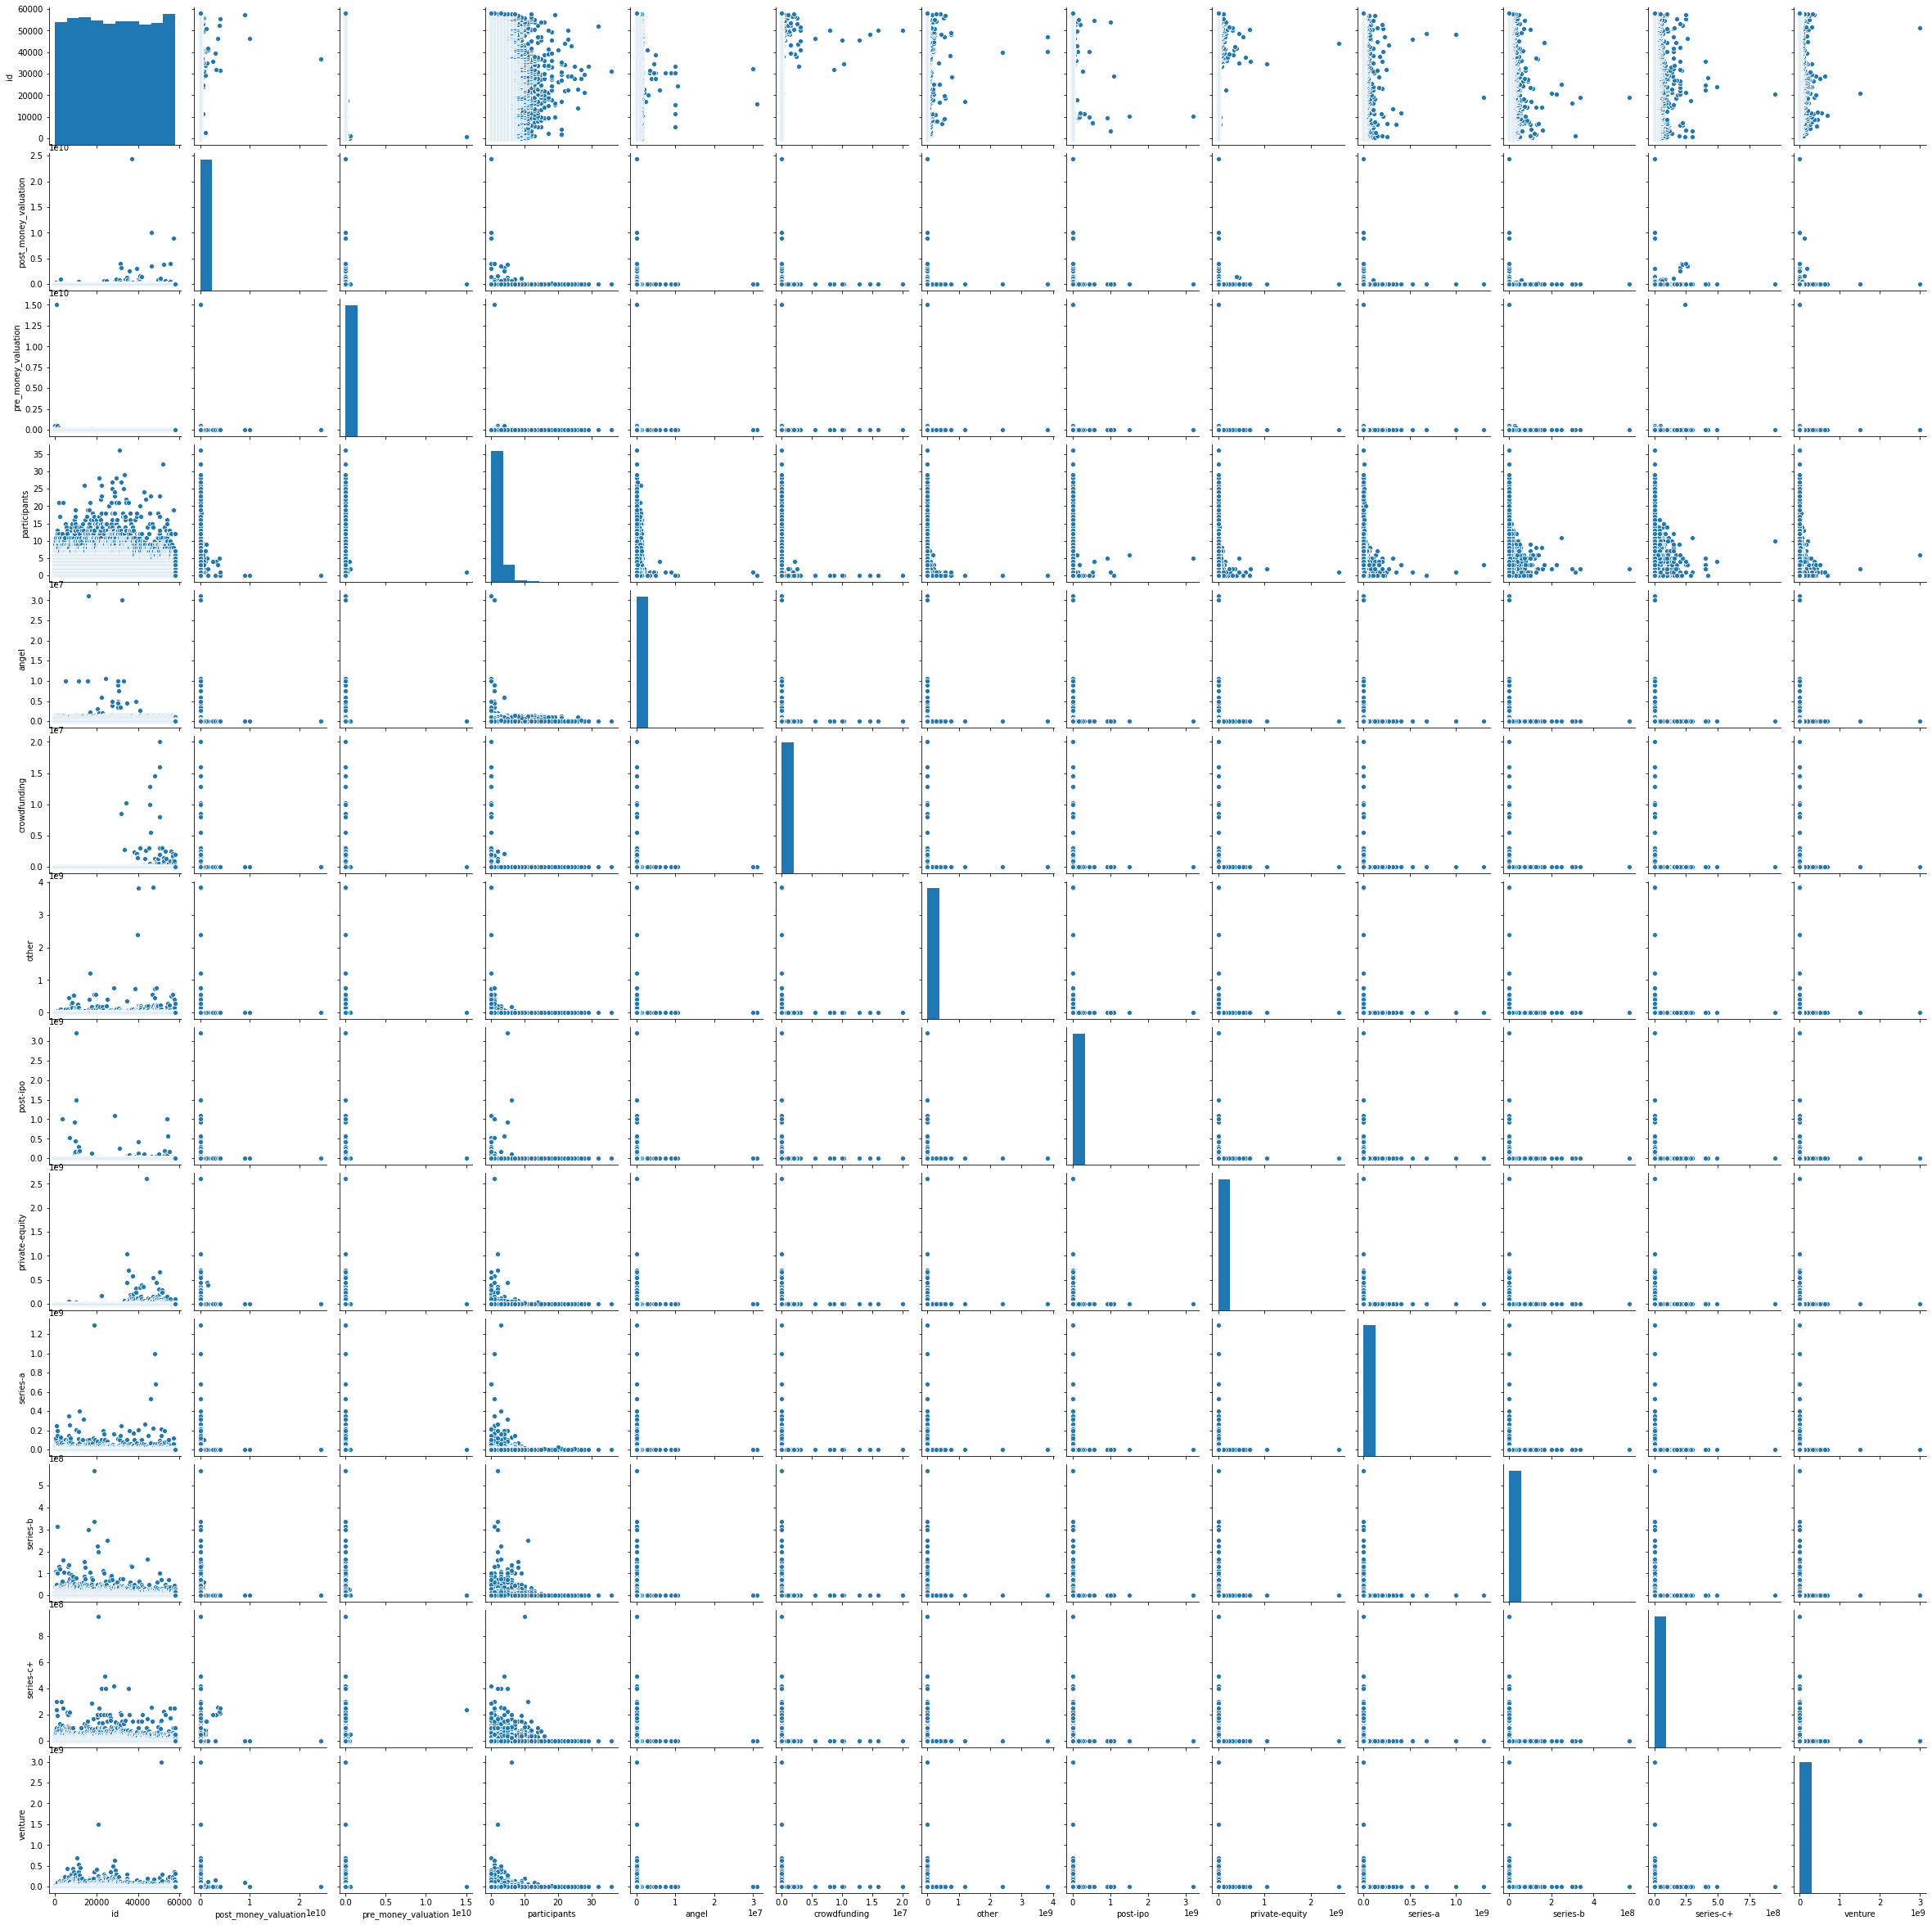

In [20]:
sns.pairplot(dfo)

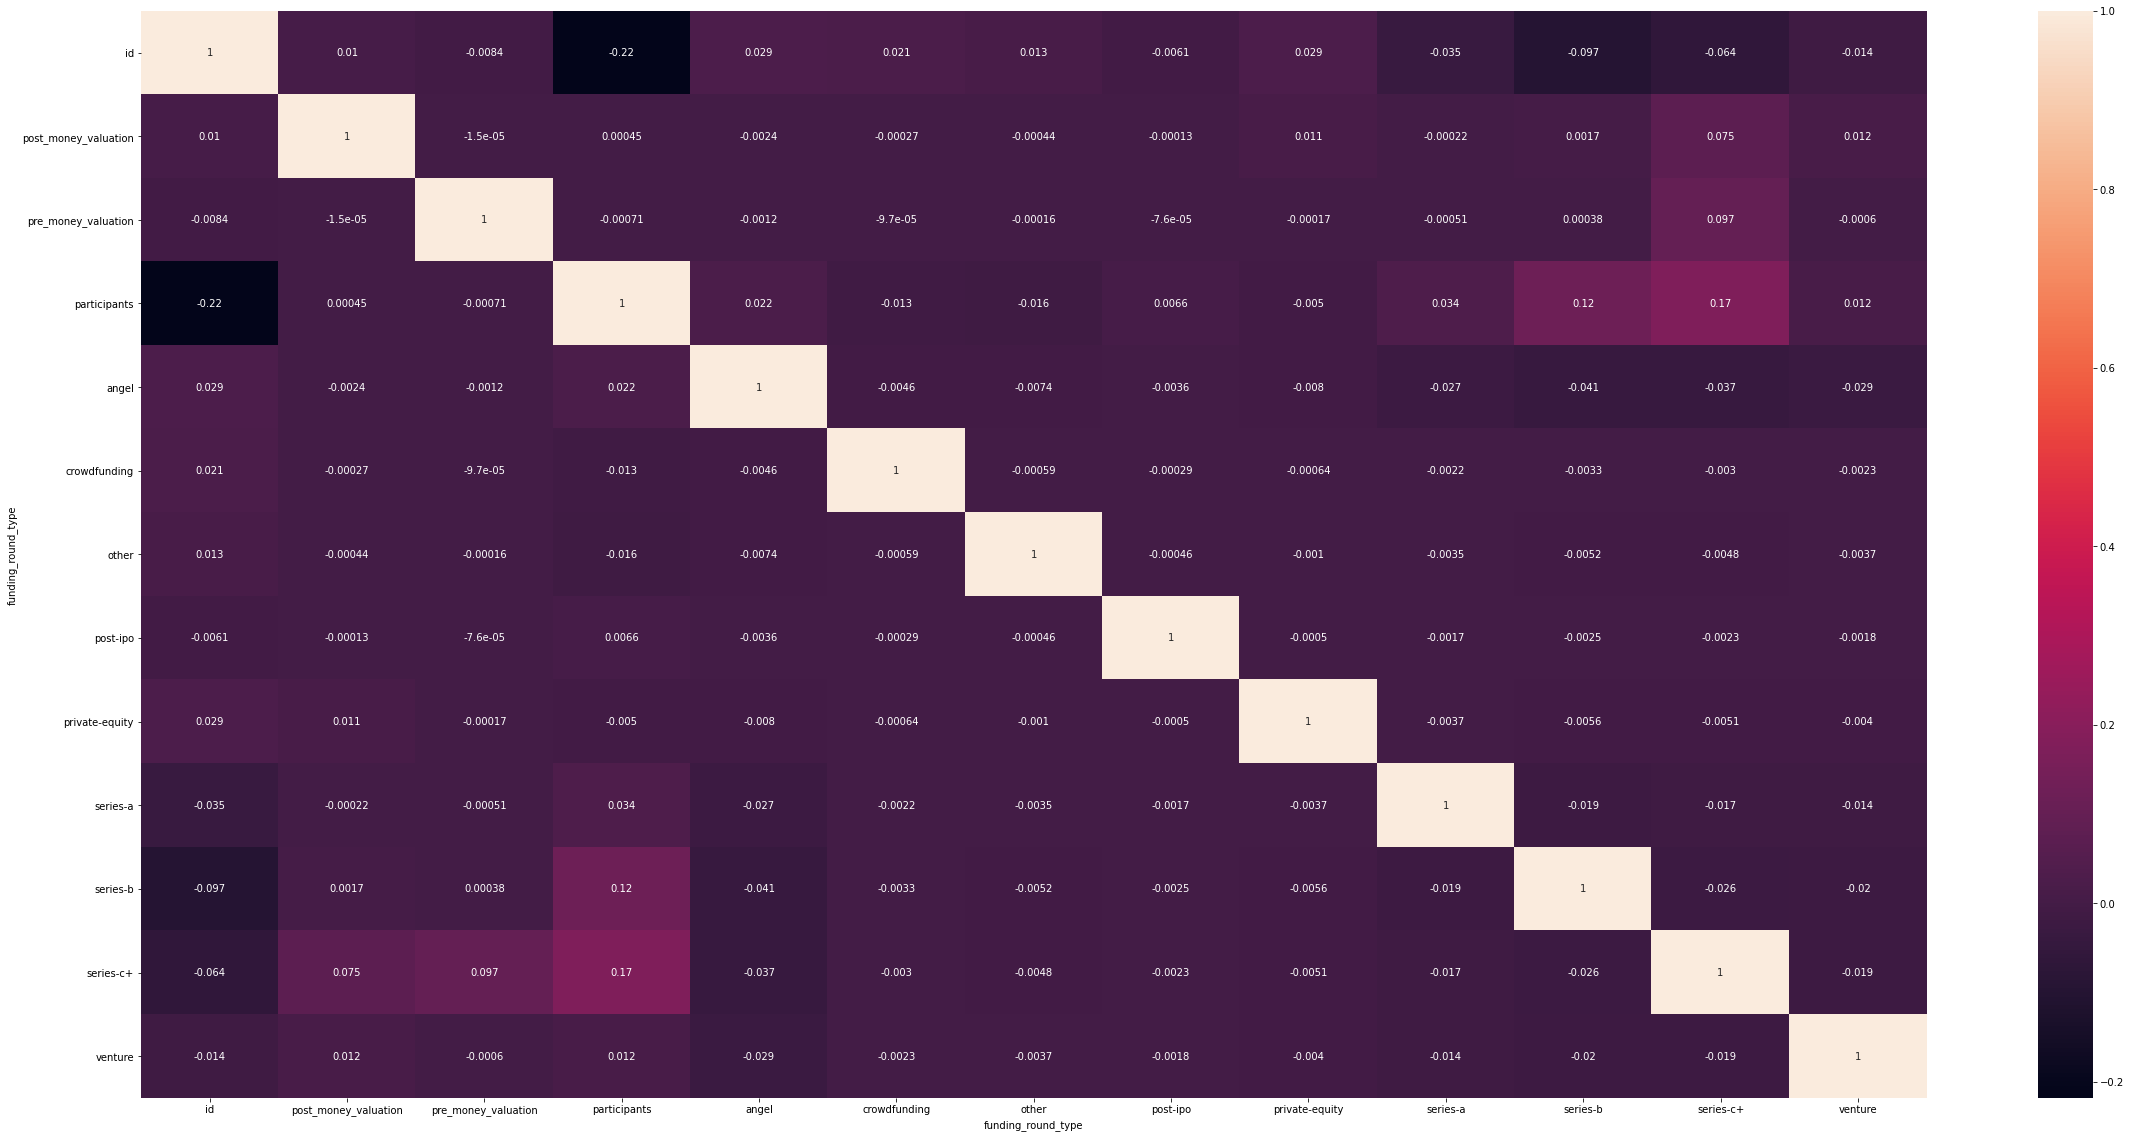

In [21]:
plt.figure(figsize=(40,20))
sns.heatmap(dfo.corr(), annot=True)

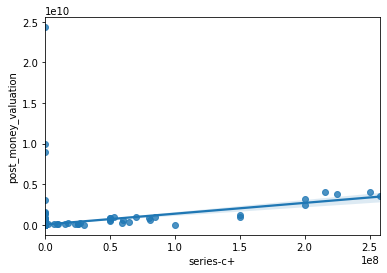

In [29]:
sns.regplot(x='series-c+', y='post_money_valuation', data=dfo)

In [24]:
#drop all post value entries with zero value as it skews correlation matrix
dfo = dfo[dfo.post_money_valuation != 0]

In [25]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 5 to 52750
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1279 non-null   int64  
 1   post_money_valuation  1279 non-null   float64
 2   pre_money_valuation   1279 non-null   float64
 3   participants          1279 non-null   int64  
 4   angel                 1279 non-null   float64
 5   crowdfunding          1279 non-null   float64
 6   other                 1279 non-null   float64
 7   post-ipo              1279 non-null   float64
 8   private-equity        1279 non-null   float64
 9   series-a              1279 non-null   float64
 10  series-b              1279 non-null   float64
 11  series-c+             1279 non-null   float64
 12  venture               1279 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 139.9 KB


In [26]:
dfo.corr()

funding_round_type,id,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
funding_round_type,,,,,,,,,,,,,
id,1.000000,0.025905,-0.195230,-0.053885,-0.022609,0.044723,0.033794,-0.004270,0.002230,-0.067390,-0.065043,-0.005122,0.025671
post_money_valuation,0.025905,1.000000,0.000768,0.022293,-0.019758,-0.003731,-0.004419,0.002113,0.064186,0.012498,0.023535,0.288665,0.210567
pre_money_valuation,-0.195230,0.000768,1.000000,0.051138,-0.012088,-0.002354,-0.003187,-0.003280,-0.002287,0.004720,0.108158,-0.006458,-0.005213
participants,-0.053885,0.022293,0.051138,1.000000,-0.014308,-0.024803,-0.001499,0.008675,0.030592,0.058571,0.108002,0.173779,0.029752
angel,-0.022609,-0.019758,-0.012088,-0.014308,1.000000,-0.010211,-0.013826,-0.014227,-0.009921,-0.032826,-0.021765,-0.028015,-0.022612
crowdfunding,0.044723,-0.003731,-0.002354,-0.024803,-0.010211,1.000000,-0.002494,-0.002566,-0.001789,-0.005920,-0.003925,-0.005053,-0.004078
other,0.033794,-0.004419,-0.003187,-0.001499,-0.013826,-0.002494,1.000000,-0.003474,-0.002423,-0.008016,-0.005315,-0.006842,-0.005522
post-ipo,-0.004270,0.002113,-0.003280,0.008675,-0.014227,-0.002566,-0.003474,1.000000,-0.002493,-0.008248,-0.005469,-0.007040,-0.005682
private-equity,0.002230,0.064186,-0.002287,0.030592,-0.009921,-0.001789,-0.002423,-0.002493,1.000000,-0.005752,-0.003814,-0.004909,-0.003962


In [27]:
dfo.describe()

funding_round_type,id,post_money_valuation,pre_money_valuation,participants,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
count,1279.000000,1.279000e+03,1.279000e+03,1279.000000,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,37741.836591,7.706544e+07,2.265520e+05,1.139171,2.250071e+05,2.042377e+03,1.642239e+04,7.625046e+04,7.016399e+05,5.116654e+05,4.789851e+05,2.105747e+06,7.518643e+05
std,10480.546778,8.251659e+08,4.131940e+06,1.901986,9.460015e+05,4.761249e+04,2.827334e+05,1.275796e+06,1.683437e+07,3.710374e+06,5.238432e+06,1.789176e+07,7.914886e+06
min,6.000000,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32177.500000,5.000000e+05,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,36394.000000,2.000000e+06,0.000000e+00,1.000000,5.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,45045.000000,5.000000e+06,0.000000e+00,1.000000,2.500000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,57761.000000,2.432423e+10,1.000000e+08,23.000000,3.000000e+07,1.400000e+06,9.670000e+06,2.650000e+07,4.500000e+08,1.000000e+08,1.350000e+08,2.580000e+08,1.700000e+08


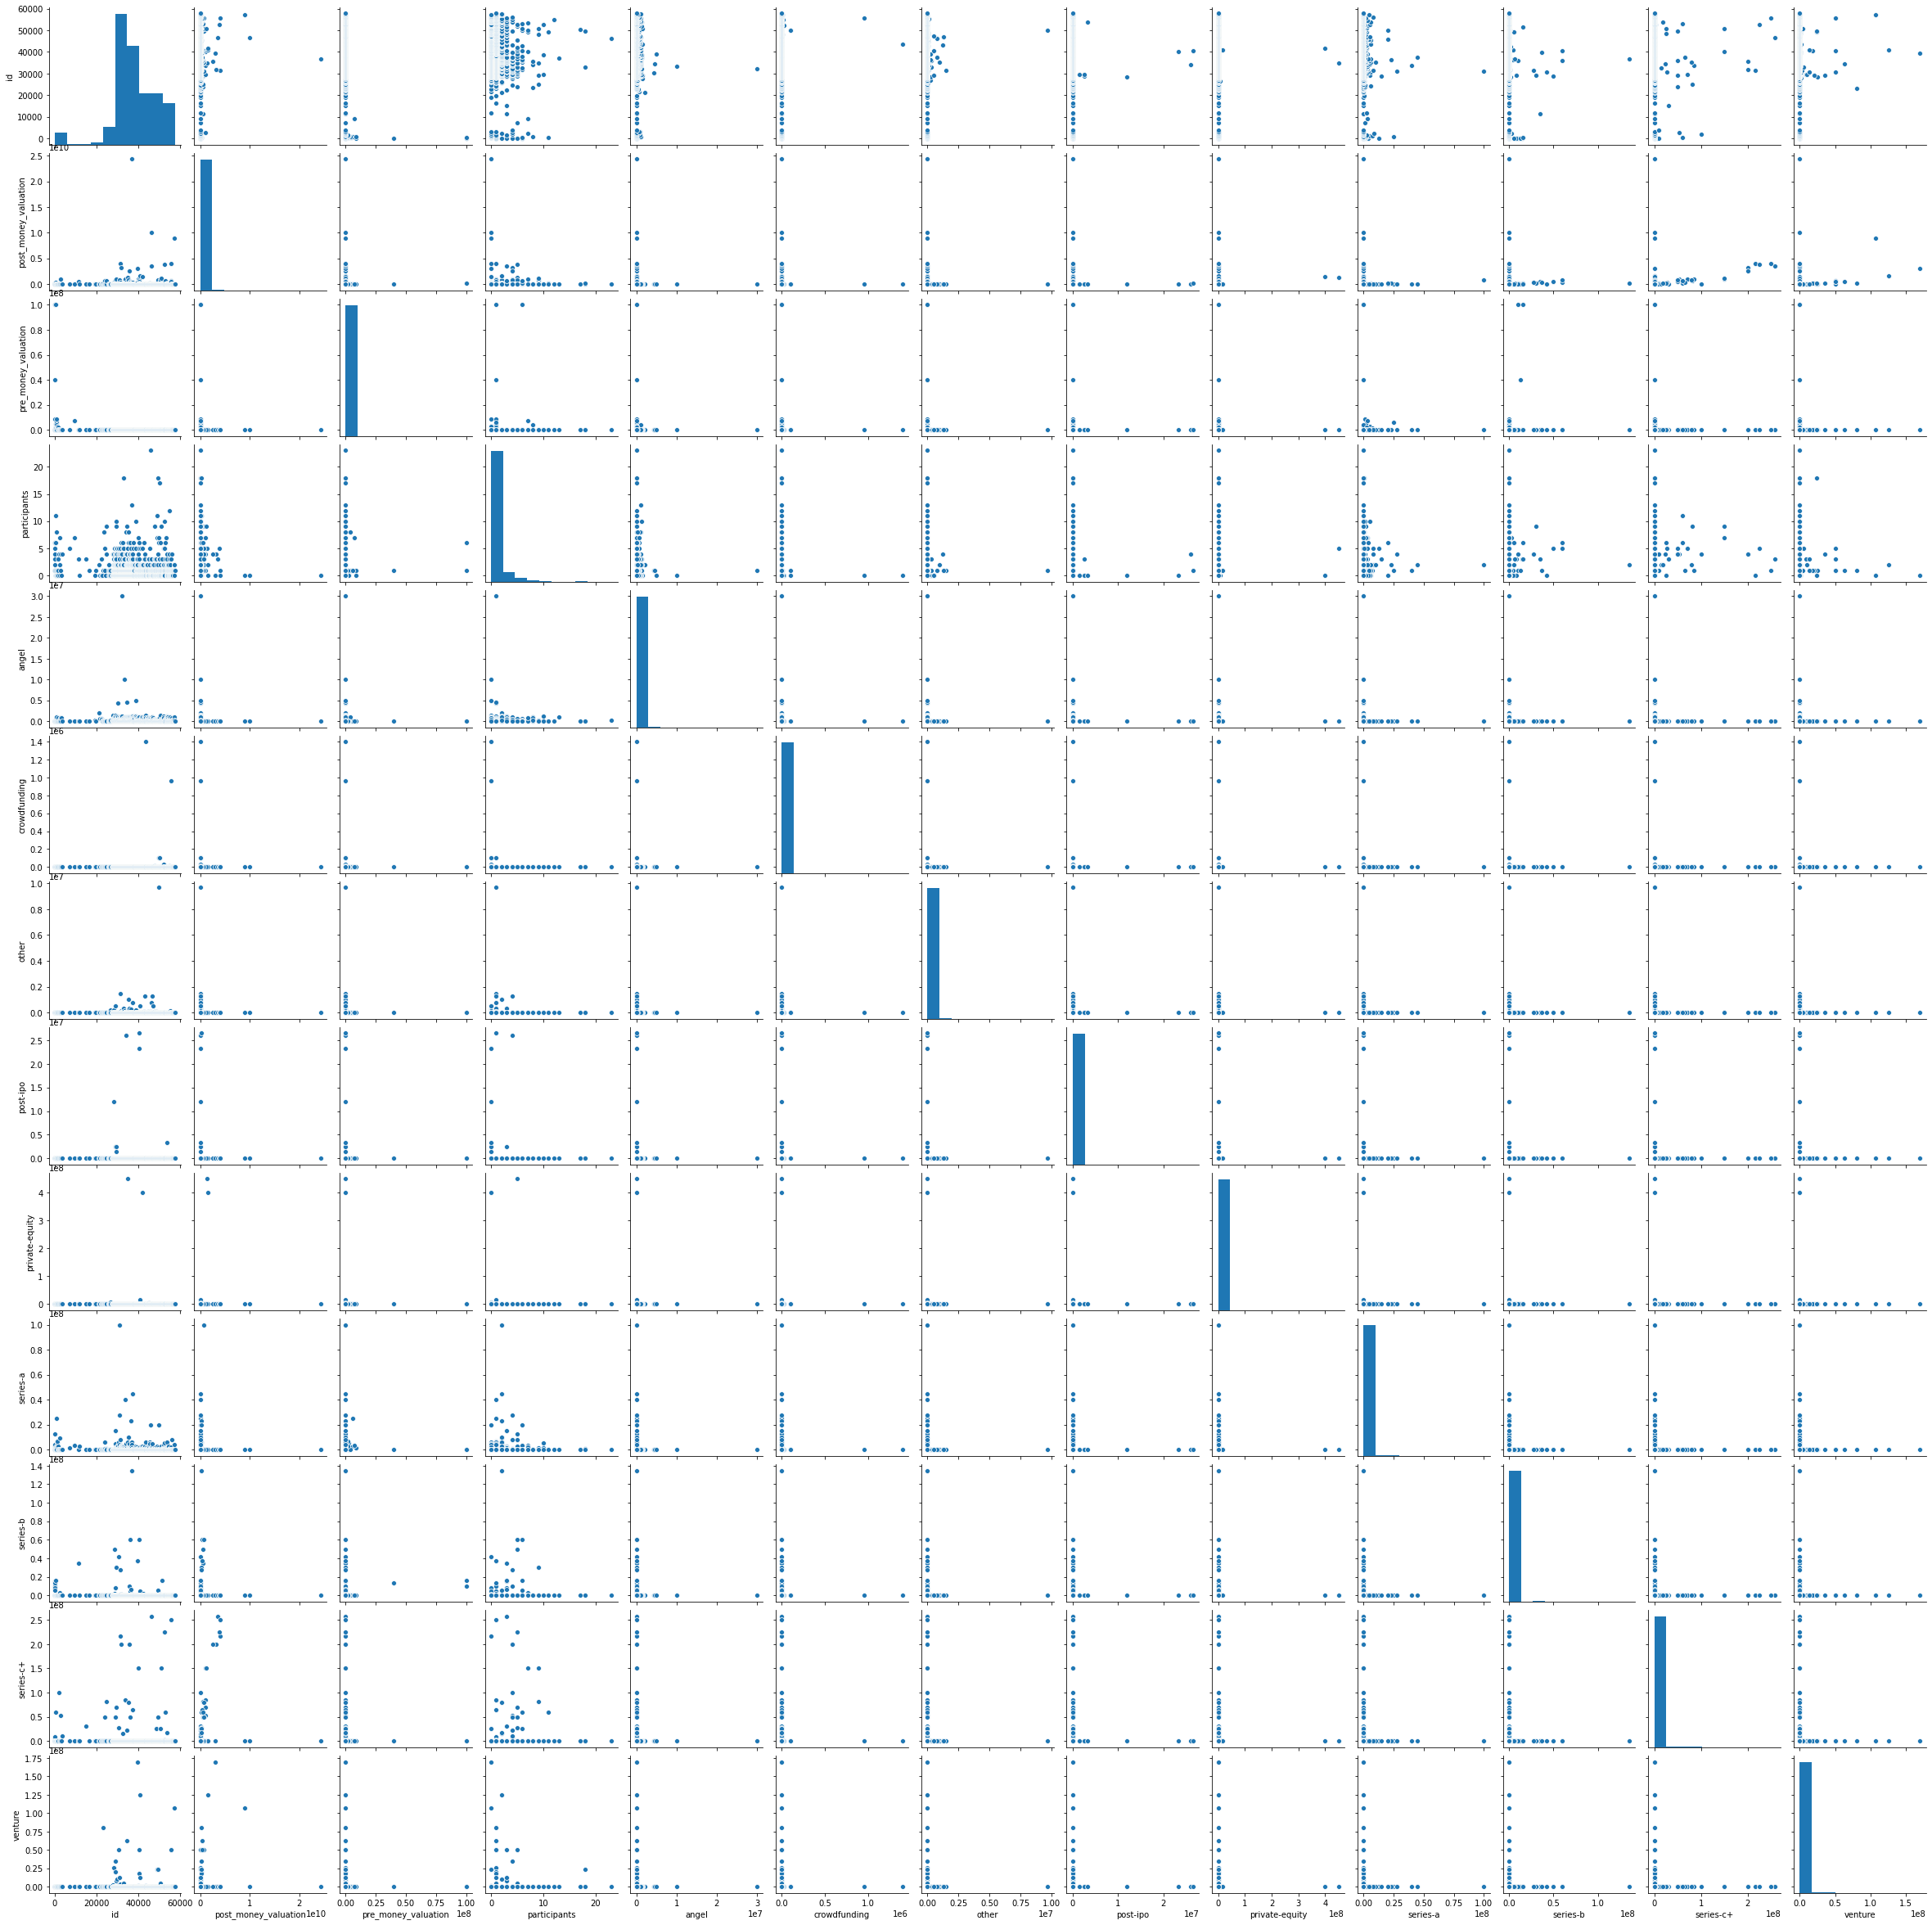

In [28]:
sns.pairplot(dfo)

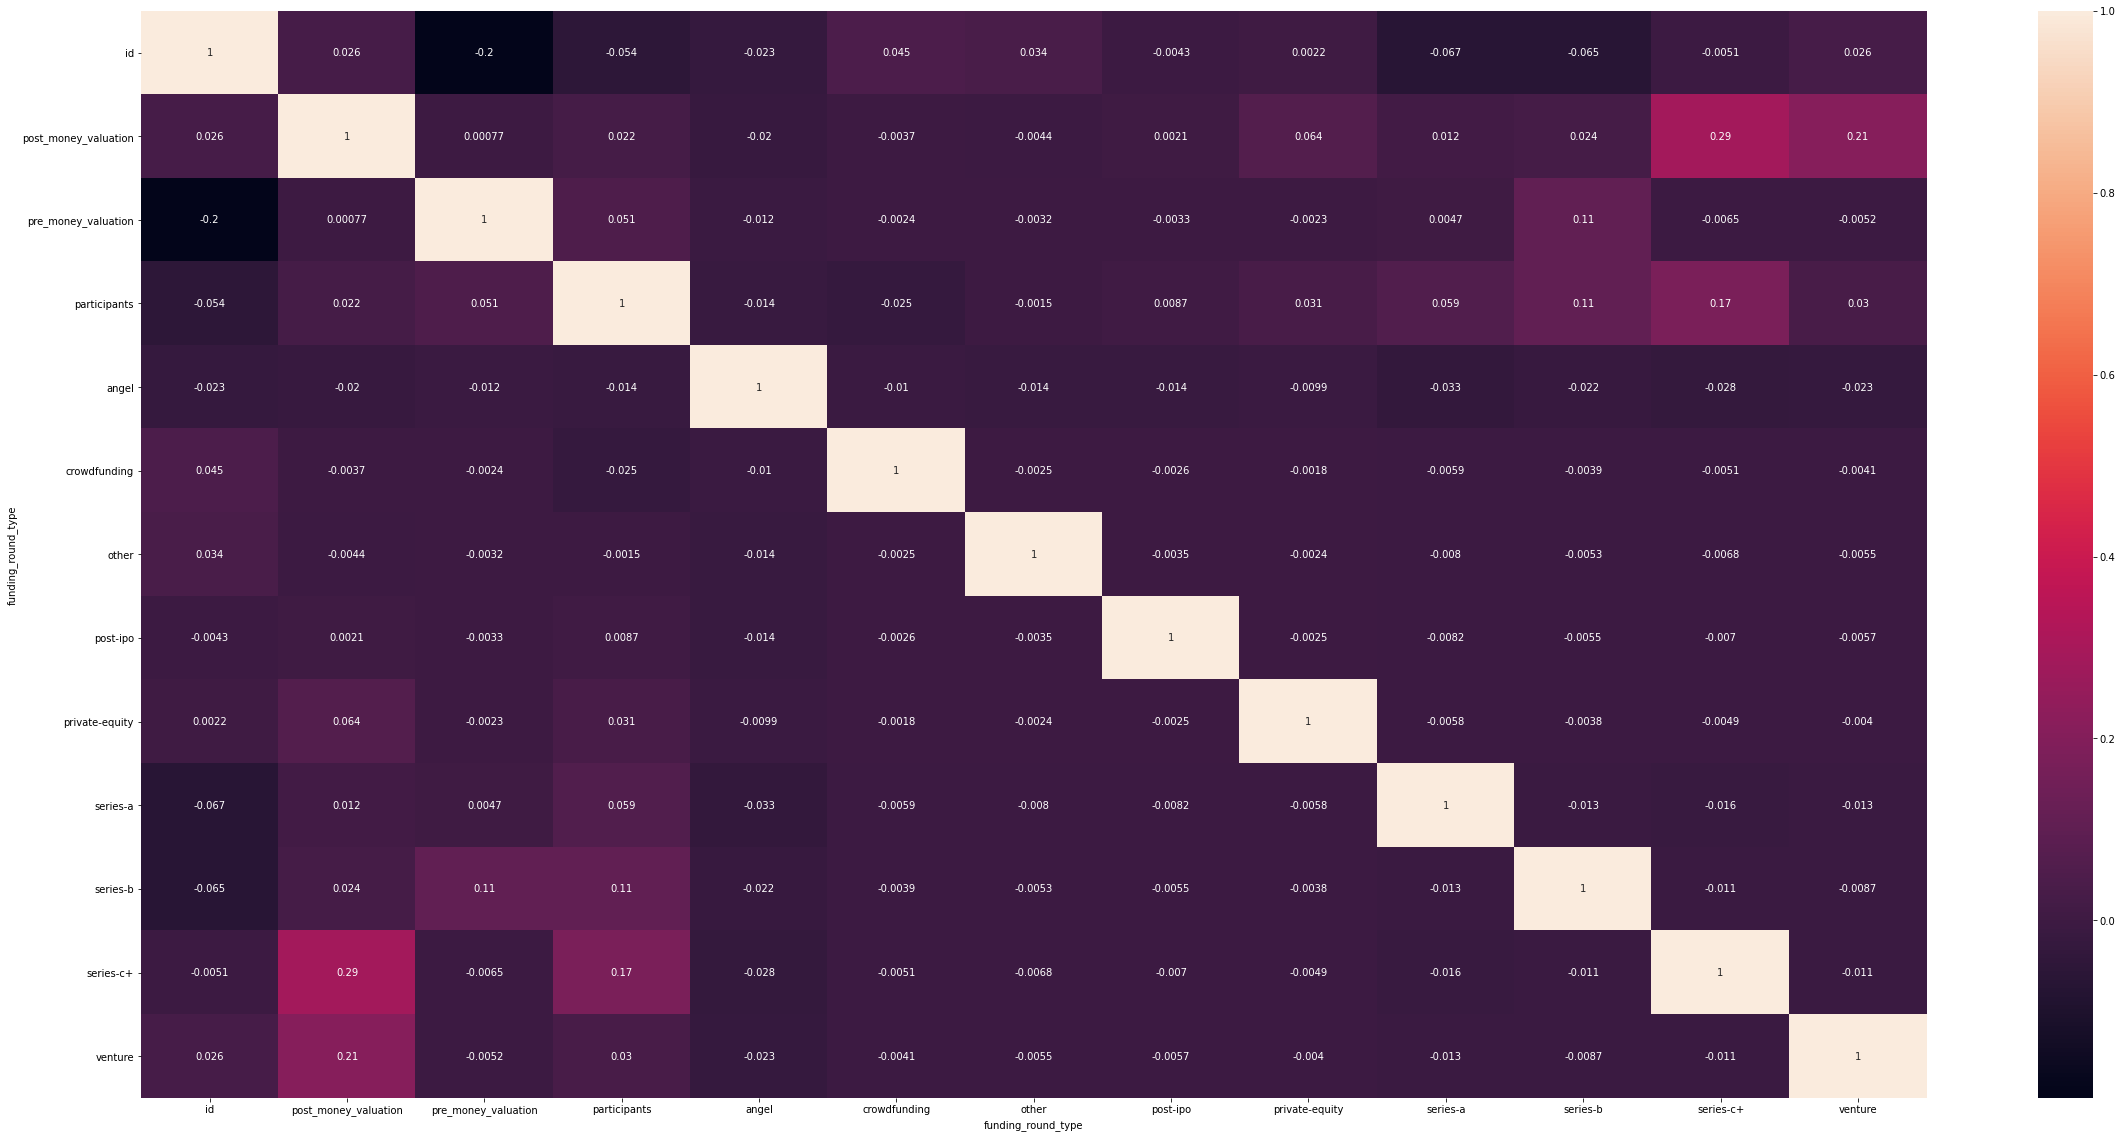

In [30]:
plt.figure(figsize=(40,20))
sns.heatmap(dfo.corr(), annot=True)

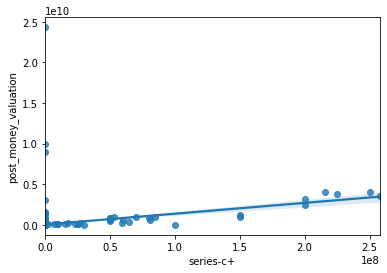

In [31]:
sns.regplot(x='series-c+', y='post_money_valuation', data=dfo)

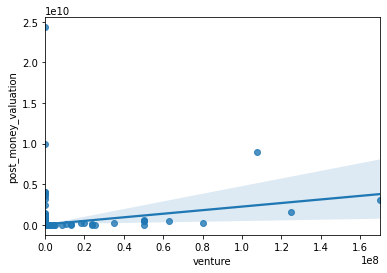

In [32]:
sns.regplot(x='venture', y='post_money_valuation', data=dfo)

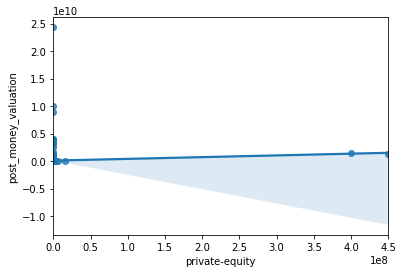

In [33]:
sns.regplot(x='private-equity', y='post_money_valuation', data=dfo)